In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('players.xlsx', index_col=0)
df

,Player nick,Country,Team,Played maps,K/D Ratio,Rating
Position,,,,,,
1,ZywOo,France,Vitality,163,1.44,1.32
2,sh1ro,Russia,Cloud9,166,1.49,1.28
3,blameF,Denmark,Astralis,198,1.31,1.26
4,XANTARES,Turkey,Eternal Fire,205,1.18,1.24
5,HEN1,Brazil,MIBR,249,1.35,1.22
...,...,...,...,...,...,...
470,BobZ,Brazil,INTZ,140,0.82,0.96
471,MiGHTYMAX,United Kingdom,Endpoint,248,0.83,0.96
472,karrigan,Denmark,FaZe,176,0.79,0.96


Country
Brazil                    61
Denmark                   49
Poland                    39
United States             33
Russia                    30
Sweden                    27
Germany                   17
Ukraine                   17
France                    16
Finland                   15
Czech Republic            14
United Kingdom            13
Bulgaria                  12
Romania                   11
Canada                    10
Portugal                   9
Serbia                     8
Belarus                    7
Argentina                  7
Israel                     6
Estonia                    6
Spain                      5
North Macedonia            5
Turkey                     5
Belgium                    5
Norway                     4
Mongolia                   4
Kosovo                     4
Slovakia                   4
South Africa               3
Hungary                    3
Kazakhstan                 2
Netherlands                2
Bosnia and Herzegovina     2
Urugua

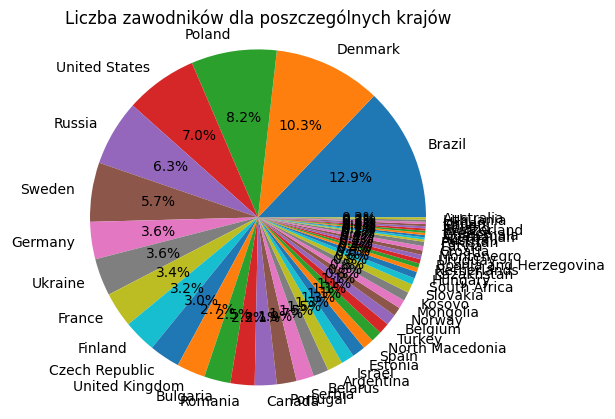

In [4]:
#ile zawodników ma dany kraj
liczba_zawodnikow = df['Country'].value_counts()
print(liczba_zawodnikow)

import matplotlib.pyplot as plt

plt.pie(liczba_zawodnikow, labels=liczba_zawodnikow.index, autopct='%1.1f%%')
plt.title('Liczba zawodników dla poszczególnych krajów')
plt.axis('equal')
plt.show()



In [74]:
#Najlepszy zawodnik z danego kraju
najlepsi_zawodnicy = df.groupby('Country')['Rating'].max().reset_index()

#Laczenie danych w jedno
wynik = pd.merge(najlepsi_zawodnicy, df, on=['Country', 'Rating'], how='left')
print(wynik)

                   Country  Rating  Player nick               Team   
0                Argentina    1.06       luchov             BESTIA  \
1                Australia    0.96       dexter               MOUZ   
2                  Austria    1.03       S3NSEY        BIG Academy   
3               Azerbaijan    0.98        sugaR           Websterz   
4                  Belarus    1.15        znxxX           Websterz   
5                  Belgium    1.18     ritchiEE           Entropiq   
6   Bosnia and Herzegovina    1.04  brutmonster      Zero Tenacity   
7                   Brazil    1.22         HEN1               MIBR   
8                 Bulgaria    1.19         h4rn         Enterprise   
9                   Canada    1.12      Twistzz               FaZe   
10                   Chile    1.08     dav1deuS                 9z   
11                 Croatia    1.16         ROGA           Partizan   
12          Czech Republic    1.19       forsyy            SINNERS   
13                 D

In [75]:
# Wskazanie najlepszego zawodnika i przyrownanie do statystyk kraju

srednia_rat = df.groupby('Country')['Rating'].mean()
srednia_kd = df.groupby('Country')['K/D Ratio'].mean()
srednia_map = df.groupby('Country')['Played maps'].mean()

# Wyszczególnienie zawodników z każdego kraju
zawodnicy_kraje = df.groupby('Country')['Player nick'].apply(list)

# Porównanie statystyk zawodników z średnimi w kraju
for kraj, zawodnicy in zawodnicy_kraje.items():
    print(f"Kraj: {kraj}")
    krajowy_df = df[df['Country'] == kraj]
    najlepszy_zawodnik = krajowy_df.loc[krajowy_df['Rating'].idxmax()]
    print("Statystyki najlepszego gracza w kraju:")
    print(najlepszy_zawodnik)
    print("\nŚrednie statystyki w kraju:")
    print("Rating:", srednia_rat.loc[kraj])
    print("KD:    ", srednia_kd.loc[kraj])
    print("Średnia zagranych map:", srednia_map.loc[kraj])
    print("\n")

Kraj: Argentina
Statystyki najlepszego gracza w kraju:
Player nick       luchov
Country        Argentina
Team              BESTIA
Played maps          136
K/D Ratio           0.99
Rating              1.06
Name: 238, dtype: object

Średnie statystyki w kraju:
Rating: 1.0185714285714285
KD:     0.9485714285714285
Średnia zagranych map: 137.85714285714286


Kraj: Australia
Statystyki najlepszego gracza w kraju:
Player nick       dexter
Country        Australia
Team                MOUZ
Played maps          138
K/D Ratio           0.87
Rating              0.96
Name: 445, dtype: object

Średnie statystyki w kraju:
Rating: 0.96
KD:     0.87
Średnia zagranych map: 138.0


Kraj: Austria
Statystyki najlepszego gracza w kraju:
Player nick         S3NSEY
Country            Austria
Team           BIG Academy
Played maps            150
K/D Ratio             1.05
Rating                1.03
Name: 322, dtype: object

Średnie statystyki w kraju:
Rating: 1.03
KD:     1.05
Średnia zagranych map: 150.0


K

In [5]:
top_10 = df.head(10)
print(top_10)

         Player nick  Country            Team  Played maps  K/D Ratio  Rating
Position                                                                     
1              ZywOo   France        Vitality          163       1.44    1.32
2              sh1ro   Russia          Cloud9          166       1.49    1.28
3             blameF  Denmark        Astralis          198       1.31    1.26
4           XANTARES   Turkey    Eternal Fire          205       1.18    1.24
5               HEN1   Brazil            MIBR          249       1.35    1.22
6             SENSEi  Ukraine            IKLA          193       1.38    1.22
7             s1mple  Ukraine   Natus Vincere          145       1.28    1.20
8               donk   Russia  Spirit Academy          202       1.18    1.20
9                mhL   Poland        Endpoint          249       1.23    1.20
10              deko   Russia            1WIN          198       1.33    1.20


In [6]:
team_df = df.sort_values(by='Team')

print(team_df)

         Player nick        Country       Team  Played maps  K/D Ratio  Rating
Position                                                                      
362         coldzera         Brazil   00NATION          139       0.98    1.01
79               nqz         Brazil   00NATION          160       1.26    1.13
137            latto         Brazil   00NATION          147       1.08    1.09
57             dumau         Brazil   00NATION          147       1.11    1.14
371       NickelBack         Russia       1WIN          215       0.93    1.01
...              ...            ...        ...          ...        ...     ...
363           Wahtzz        Estonia      sYnck          168       1.00    1.01
356            shane  United States  timbermen          212       0.99    1.01
28              dare  United States  timbermen          218       1.14    1.17
334            droid  United States  timbermen          191       0.98    1.02
305             snav  United States  timbermen      

In [7]:

sumy_ratingow = team_df.groupby('Team')['Rating'].sum()

# Wybór drużyny z najwyższą sumą ratingów
najlepsza_druzyna = sumy_ratingow.idxmax()

zawodnicy_najlepszej_druzyny = team_df[team_df['Team'] == najlepsza_druzyna]
print("Drużyna z najlepszymi ratingami:", najlepsza_druzyna)
print("Zawodnicy tej drużyny:")
print(zawodnicy_najlepszej_druzyny)

Drużyna z najlepszymi ratingami: ATK
Zawodnicy tej drużyny:
          Player nick        Country Team  Played maps  K/D Ratio  Rating
Position                                                                 
190       b0denmaster         Sweden  ATK          259       1.08    1.07
32            Swisher  United States  ATK          309       1.14    1.17
273            MisteM   South Africa  ATK          293       1.00    1.05
444              djay         Canada  ATK          184       0.92    0.96
226             Fadey   South Africa  ATK          145       1.04    1.06
175             WolfY  United States  ATK          140       1.13    1.08
248              reck  United States  ATK          209       1.05    1.05


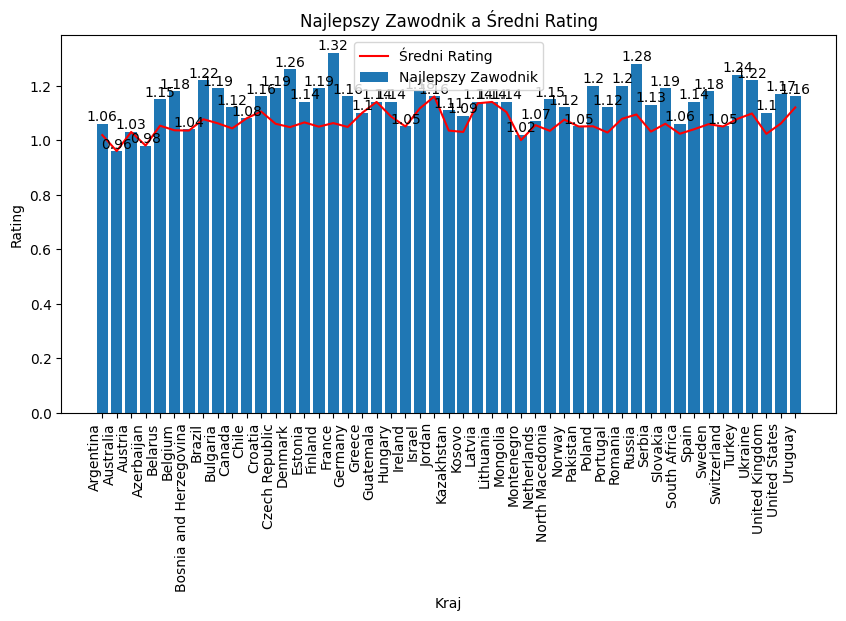

In [32]:
best_players = df.groupby('Country').apply(lambda x: x.loc[x['Rating'].idxmax()])

# Obliczanie średniego ratingu dla każdego kraju
average_ratings = df.groupby('Country')['Rating'].mean()

fig, ax = plt.subplots(figsize=(10, 6))

# Tworzenie wykresu słupkowego
plt.bar(best_players['Country'], best_players['Rating'], label='Najlepszy Zawodnik')
plt.plot(average_ratings.index, average_ratings, 'r-', label='Średni Rating')

# Dodawanie etykiet na wykresie
for i, rating in enumerate(best_players['Rating']):
    plt.text(i, rating, str(round(rating, 2)), ha='center', va='bottom')

# Konfiguracja osi, tytułu i legendy wykresu
plt.xlabel('Kraj')
plt.ylabel('Rating')
plt.title('Najlepszy Zawodnik a Średni Rating')
plt.legend()

plt.xticks(rotation=90, ha='right')
plt.subplots_adjust(bottom=0.25)
# Wyświetlanie wykresu
plt.show()